In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("D:/Folder/Data Analysis/datasets/titanic/train.csv")
#print(data) # to display the entire dataset
#print(data.describe()) # used to generate descriptive statistics of numerical columns of the dataset
#print(data.info()) # provides a summary of data types, null counts, memory usage of the dataset
print(data['Ticket'].value_counts()) # displays how often a unique value appears in the specified column

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64


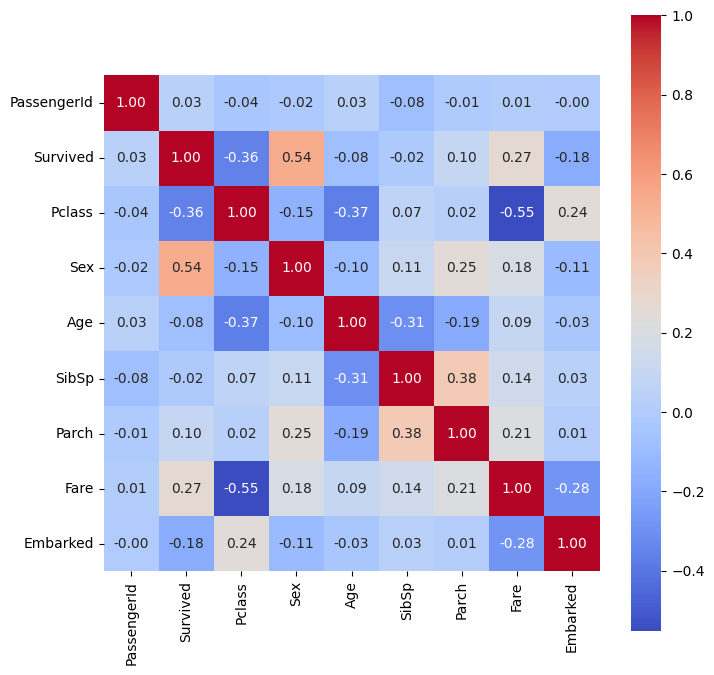

In [13]:
# converting categorical data into numeric
data_numeric = data.copy()
data_numeric['Sex'] = data_numeric['Sex'].map({'male': 0, 'female': 1})
data_numeric['Embarked'] = data_numeric['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

data_numeric = data_numeric.drop(columns=['Name', 'Ticket', 'Cabin']) # to drop irrelevant columns
data_clean = data_numeric.dropna() # to drop rows with null or missing values
correlation = data_clean.corr() # to compute correlation

# plotting the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True, cmap = 'coolwarm', fmt=".2f", square = True)
plt.show()

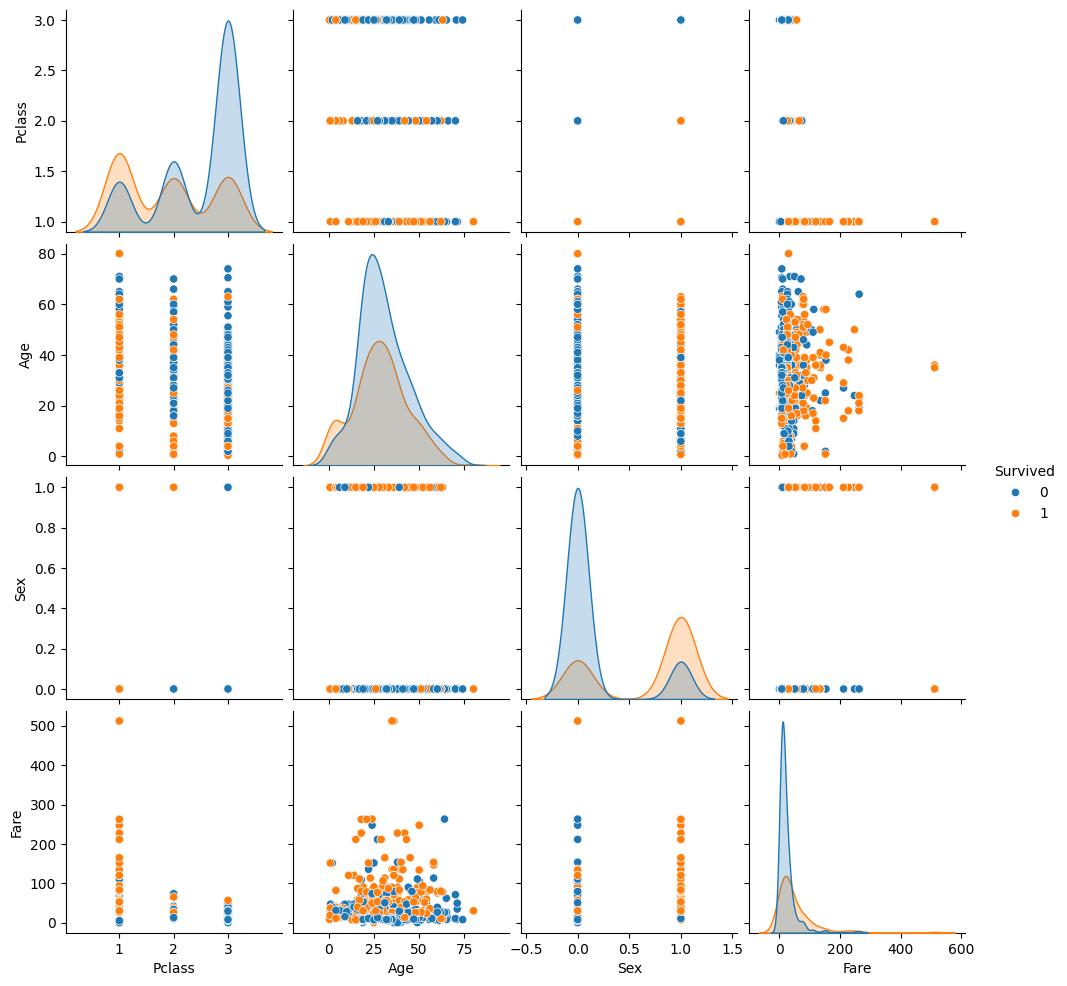

In [14]:
# creating a pairplot for pclass, sex, age, fare and survival rate

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
selected_columns = ['Survived','Pclass', 'Age', 'Sex', 'Fare'] # to select relevant numeric columns
data_clean = data[selected_columns].dropna() # to drop rows with missing values in the selected columns
sns.pairplot(data_clean, hue='Survived')
plt.show()

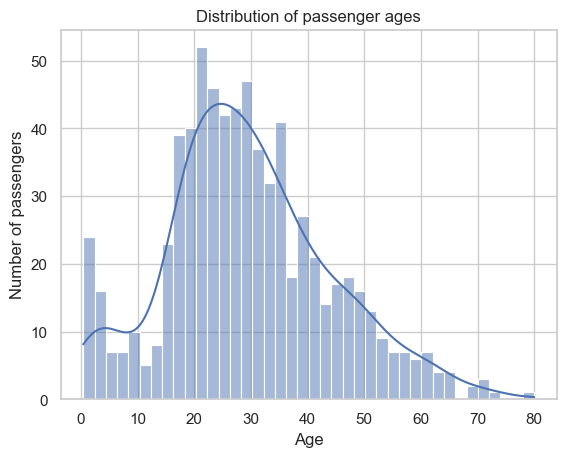

In [78]:
# creating a histogram for Age

sns.set(style="whitegrid")
sns.histplot(data['Age'].dropna(), bins=40, kde=True)
plt.title('Distribution of passenger ages')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.show()

C:\Users\Daksha\AppData\Local\Temp\ipykernel_17064\1701866703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = 'Pclass', y = 'Age', palette = "spring")


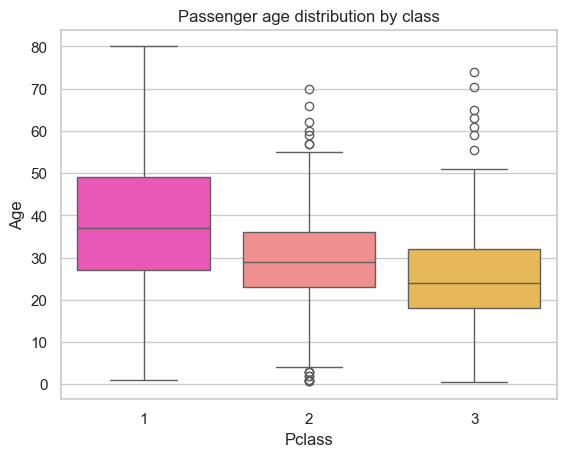

In [113]:
#creating a boxplot classifying passengers on the basis of class and age

data = data.dropna(subset=['Age'])
sns.boxplot(data = data, x = 'Pclass', y = 'Age', palette = "spring")
plt.title('Passenger age distribution by class')
plt.show()

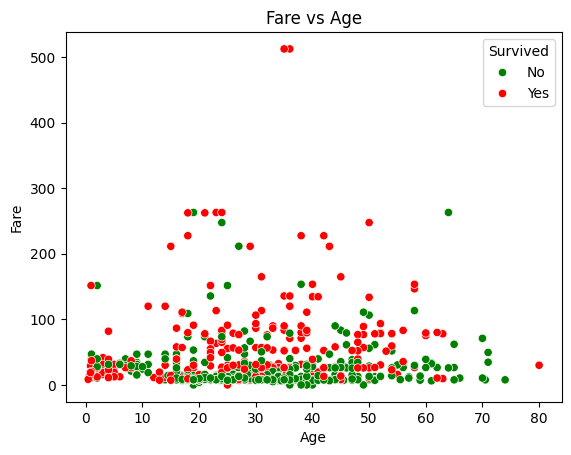

In [2]:
#creating a scatter plot classifying passengers on the basis of age and fare

data = data.dropna(subset=['Age', 'Fare'])
data['Survived'] = data['Survived'].map({0: 'No', 1: 'Yes'})
sns.scatterplot(data=data, x = 'Age', y = 'Fare', hue='Survived', palette={'No': 'green', 'Yes': 'red'})
plt.title('Fare vs Age')
plt.legend(title='Survived')
plt.show()